In [1]:
import matplotlib.pyplot as plt
plt.close("all")
import sqlite3
import pandas as pd


In [2]:
#Find countries with the highest numbers of artists
con = sqlite3.connect('musicbrainz.db')
artist_area_df = pd.read_sql_query("select count(Area_Alias.area_code) as Frequency, Area_Alias.area_name as Area from Artist LEFT JOIN Area_Alias ON Area_Alias.area_code = Artist.area_code GROUP BY Area_Alias.area_code ORDER BY Frequency DESC LIMIT 20", con)
con.commit()
con.close()
print(artist_area_df)

    Frequency        Area
0     1017086    Alemania
1      798754    Giappone
2      429957      France
3      422664      Belgia
4      290554     Itaalia
5      222640      Rootsi
6      222354      Canada
7      217226       Rusia
8      212520     Finland
9      208260  Alankomaat
10     190971     Espagne
11     176955         USA
12     175527  Austraalia
13     109648   Brasiilia
14     107635     Austria
15     103235      Poland
16      97460    Danemark
17      97119     Schweiz
18      97009      Grecia
19      90123       Eesti


<AxesSubplot:xlabel='Area'>

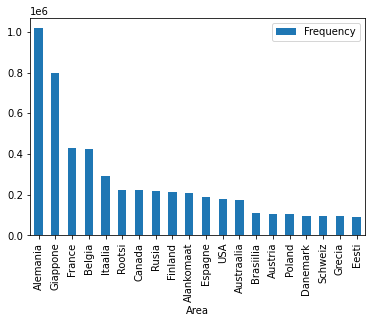

In [3]:
artist_area_df.plot(x = 'Area', y = 'Frequency', kind = 'bar')

In [4]:
#Find most frequent countries for recording data
con = sqlite3.connect('musicbrainz.db')
release_area_df = pd.read_sql_query("select Area_Alias.area_name as Area, count( Area_Alias.area_code) as Frequency from Release_Country INNER JOIN Release_Alias ON Release_Country.id = Release_Alias.release_code LEFT JOIN Area_Alias ON Area_Alias.area_code = Release_Country.country_id GROUP BY Release_Country.country_id ORDER BY Frequency DESC LIMIT 20", con)
con.commit()
con.close()
print(release_area_df)

              Area  Frequency
0         Giappone      62524
1         Alemania      42868
2           France      19591
3       Alankomaat      15576
4            Rusia      15504
5          Euroopa      13673
6          Itaalia      12452
7       Austraalia      11924
8           Canada      11770
9        Hong Kong      11037
10         Espagne      10384
11          Rootsi      10197
12       Brasiilia       9977
13          Belgia       9878
14      Portogallo       9660
15            Inde       9614
16  Czech Republic       9600
17        Danemark       9526
18         Turchia       9492
19          Poland       9383


<AxesSubplot:xlabel='Area'>

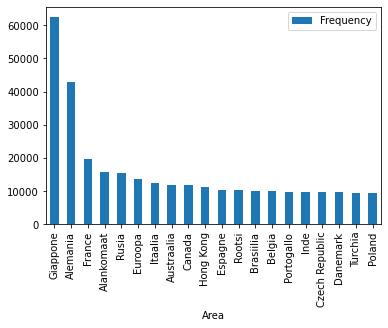

In [5]:
release_area_df.plot(x = 'Area', y = 'Frequency', kind = 'bar')

In [6]:
#Compare years by the number of recordings created each year
con = sqlite3.connect('musicbrainz.db')
year_freq_df = pd.read_sql_query("select Release_Country.release_date,  count( Release_Country.release_date) as Frequency from Release_Country INNER JOIN Release_Alias ON Release_Country.id = Release_Alias.release_code LEFT JOIN Area_Alias ON Area_Alias.area_code = Release_Country.country_id WHERE Release_Country.release_date <> '\\N' GROUP BY Release_Country.release_date ORDER BY release_date DESC LIMIT 25", con)
con.commit()
con.close()
print(year_freq_df)

    release_date  Frequency
0           2023       5958
1           2022     106968
2           2021     189489
3           2020     269447
4           2019     152332
5           2018     151581
6           2017     118920
7           2016      79365
8           2015      87728
9           2014      52367
10          2013      62119
11          2012      50776
12          2011      31661
13          2010      22448
14          2009      37179
15          2008      29023
16          2007      16499
17          2006      17337
18          2005      12496
19          2004       8901
20          2003       8448
21          2002       7354
22          2001       5319
23          2000       5013
24          1999       4369


<AxesSubplot:xlabel='release_date'>

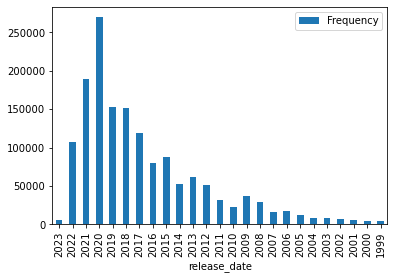

In [7]:
year_freq_df.plot(x = 'release_date', y = 'Frequency', kind = 'bar')